# Multivariable Linear Regression

### Multivariable linear regression 식인 y=w1x1+w2x2+w3x3+b에서 weight(w1, w2, w3) 값과 bias(b) 값을 텐서플로우 구현하여 찾아보고자한다.

### 이번에는 weight, bias를 여러개 설정하여 값을 구하지 않고, matrix 계산으로 한번에 구해본다.

In [4]:
##tenssorflow==2.3 환경에서 구현  
import tensorflow as tf
# weigh와 bias 변수 설정
w = tf.Variable(tf.random.uniform([1,3])) #weight 1*3 matrix를 variable로 설정
b = tf.Variable(tf.random.uniform([1]))

#input 데이터와 ouput 데이터 설정
#x1,x2,x3는 y와 각각 일정한 관계를 형성하는데 x1의 1배, x2는 1/2배, x3는 2배를하여 합산한 후, 10을 더한 값이 y값이고 이때, 가중치인 1, 1/2, 2와 bias 10을 텐서플로우로 구현
label_x=[[10,30,40,60,70], [34,12,44,22,50], [12,4,34,5,30]] #input data [[x1데이터],[x2데이터],[x3데이터]]
label_y=[61,54,140,91,165] #output data   

In [5]:
#loss function 정의
def loss_function():
#w,b를 aprroximation하여 pred_y값을 도출하고 Mean squared error를 loss function으로 loss 값도출
  pred_y = tf.matmul(w,label_x) + b # w*x는 행렬 곱셈 후, bias를 더하여 pred_y를 계산
  cost = tf.reduce_mean(tf.square(pred_y - label_y)) #Mean squared error를 loss function으로 활용 
  return cost


optimizer = tf.optimizers.Adam(learning_rate=0.01) #보편적으로 가장 많이 사용하는 adam optimizer 활용
for step in range(10000): #train
    cost_val=optimizer.minimize(loss_function, var_list=[w,b])
    if step % 100 == 0:
        print(step,"loss_value:", loss_function().numpy(), 'weight:', w.numpy(), 'bias:', b.numpy()[0])


0 loss_value: 3369.308 weight: [[0.36058468 0.9976525  0.09665639]] bias: 0.97861356
100 loss_value: 47.571087 weight: [[0.9281533 1.5568345 0.6825515]] bias: 1.5304638
200 loss_value: 43.12451 weight: [[0.93470854 1.5347482  0.74352884]] bias: 1.4877094
300 loss_value: 38.57496 weight: [[0.9369372  1.4963375  0.80844057]] bias: 1.4284222
400 loss_value: 33.86727 weight: [[0.94202626 1.4509988  0.87875855]] bias: 1.366013
500 loss_value: 29.283932 weight: [[0.9494812 1.4010429 0.951631 ]] bias: 1.3053689
600 loss_value: 25.02114 weight: [[0.9584435 1.3485644 1.0251833]] bias: 1.2504969
700 loss_value: 21.206367 weight: [[0.96809644 1.2953657  1.0979825 ]] bias: 1.2047918
800 loss_value: 17.906155 weight: [[0.97781307 1.2429013  1.1687939 ]] bias: 1.171108
900 loss_value: 15.13566 weight: [[0.9871685 1.1922857 1.2365359]] bias: 1.1517814
1000 loss_value: 12.871251 weight: [[0.99589443 1.1443394  1.3003088 ]] bias: 1.1486212
1100 loss_value: 11.0629835 weight: [[1.0038298 1.0996307 1.359

## plot result

tf.Tensor([[ 61.000023  54.00001  140.00002   91.00002  165.00003 ]], shape=(1, 5), dtype=float32)


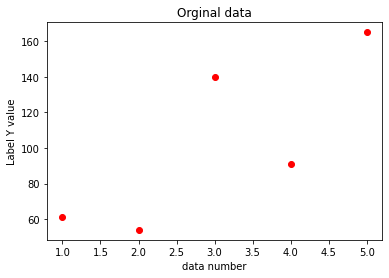

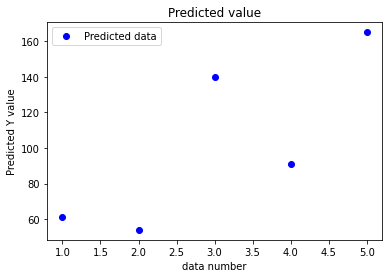

In [18]:
import matplotlib.pyplot as plt
pred_y_list= tf.matmul(w,label_x)+b #위에서 구한 weight와 bias값을 이용해 y값 prediction
print(pred_y_list) #실제 y값과 비교
data_number=[1,2,3,4,5]
# original data plot
plt.title("Orginal data")
plt.xlabel("data number")
plt.ylabel("Label Y value")
plt.plot(data_number, label_y, 'ro', label='Original data')
plt.show()
# predicted value plot
plt.title("Predicted value")
plt.xlabel("data number")
plt.ylabel("Predicted Y value")
plt.plot(data_number, pred_y_list[0],'bo', label='Predicted data')
plt.legend()
plt.show()